In [1]:
# 加载需要的模块
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# 设置matplotlib初始环境
# 设置图表的参数
plt.rcParams['font.family'] = 'Microsoft Yahei'
# 使用unicode_minus参数设置正常显示负号
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 加载数据
df = pd.read_csv('data.csv')
# 查看数据
df.head()

,brand,price,tags
0,吉利汽车,10.58,超值_0过户
1,别克,12.00,NaN
2,丰田,10.00,超值_0过户
3,日产,6.60,超值_0过户
4,马自达,15.58,超值_里程少_0过户


In [4]:
# 数据清洗
# 查看缺失值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   2648 non-null   object 
 1   price   2648 non-null   float64
 2   tags    2464 non-null   object 
dtypes: float64(1), object(2)
memory usage: 62.2+ KB


### 平均价格最高的前10个品牌

In [5]:
# 根据品牌进行分组，查看价格的平均值
data_mean = df.groupby('brand')['price'].mean()
# 将数据排序,并获取前10条数据
data_mean.sort_values(ascending=False).head(10)

brand
宾利      85.000000
玛莎拉蒂    57.000000
保时捷     47.942857
路虎      37.835500
雷克萨斯    33.994000
理想汽车    27.726667
奔驰      26.870581
特斯拉     26.833333
蔚来      25.800000
GMC     25.500000
Name: price, dtype: float64

<Axes: xlabel='brand'>

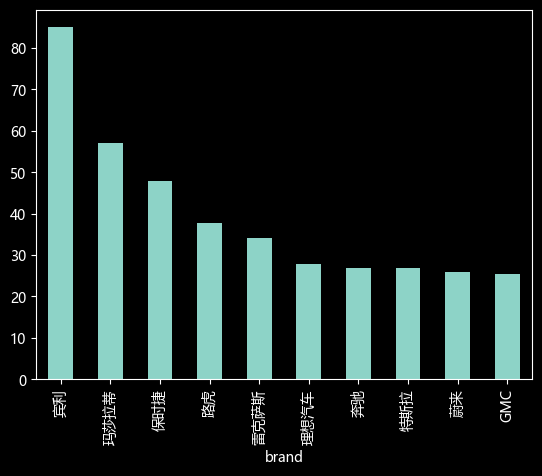

In [6]:
# 通过图表 查看数据
data_mean.sort_values(ascending=False).head(10).plot(kind='bar')

In [7]:
# 销量最多的前10个品牌
amount_top = df["brand"].value_counts(sort=True)[:10]
amount_top

brand
大众    321
宝马    168
别克    164
奔驰    155
奥迪    147
丰田    146
本田    134
福特    100
日产     89
现代     74
Name: count, dtype: int64

<BarContainer object of 10 artists>

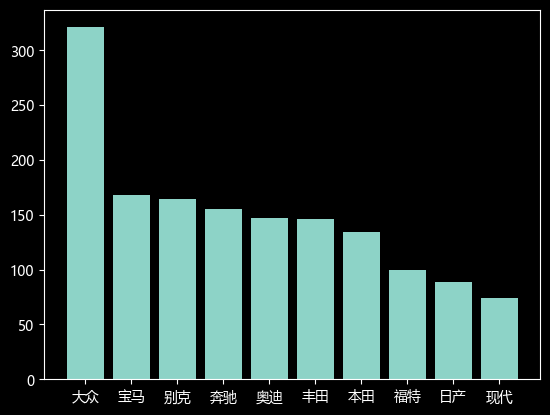

In [8]:
# amount_top.plot(kind='pie', autopct='%.2f%%')
# plt.pie(amount_top, labels=amount_top.index, autopct='%.2f%%')
plt.bar(amount_top.index, amount_top.values)

### top10品牌销量与品牌销量占比分析

In [9]:
# 查看数据
df.head()

,brand,price,tags
0,吉利汽车,10.58,超值_0过户
1,别克,12.00,NaN
2,丰田,10.00,超值_0过户
3,日产,6.60,超值_0过户
4,马自达,15.58,超值_里程少_0过户


In [10]:
# 获取top10品牌销售的数量
# df['brand'].value_counts().sort_values(ascending=False).head(10)
amount_top = df['brand'].value_counts(sort=True).head(10)

<Axes: title={'center': '销量最多的前10个品牌'}, xlabel='brand'>

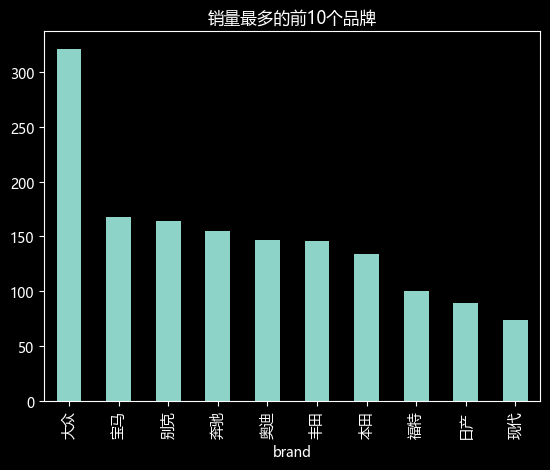

In [11]:
# 通过bar图查看数据
amount_top.plot(kind='bar',title='销量最多的前10个品牌')
# ----------------------
# plt.bar(amount_top.index, amount_top.values)

<Axes: ylabel='count'>

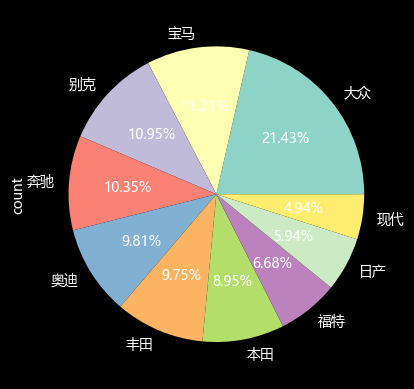

In [12]:
# 通过pie图查销售数据的占比
amount_top.plot(kind='pie', autopct='%.2f%%')
#-----------------------
# plt.pie(amount_top,labels=amount_top.index,autopct='%.2f%%')

In [13]:
# 切换plt的主题
# plt.style.available
# plt.style.use('seaborn-v0_8-notebook')

### 查看某品牌价格分区的概率密度

In [14]:
# 筛选数据
df_dazhong = df[df['brand']=='大众']
df_dazhong.head(5)

,brand,price,tags
18,大众,1.50,超值_急售
19,大众,2.70,超值_急售
33,大众,9.98,超值
36,大众,9.50,0过户
39,大众,13.50,0过户


Text(0, 0.5, '概率密度')

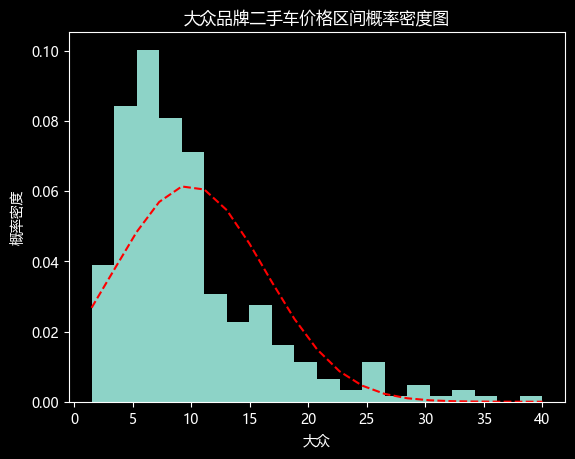

In [15]:
# 计算大众品牌车辆的不同价格区间的概率密度
from scipy.stats import norm
# 获取价格的区间
num_bins = 20
# 绘制直方图
# density用于控制直方图是否进行归一化。density=True，直方图的纵轴表示概率密度，而不是样本的数量。
n,bins,patches = plt.hist(df_dazhong['price'],num_bins,density=True)
# 获取均值
dazhong_mean = df_dazhong['price'].mean()
# 获取标准差
dazhong_std = df_dazhong['price'].std()
y = norm.pdf(bins,dazhong_mean,dazhong_std)
# 将概率密度值绘制到直方图上
plt.plot(bins,y,'r--')
# 设置标题
plt.title('大众品牌二手车价格区间概率密度图')
# 设置x轴的名称
plt.xlabel('大众')
# 设置y轴的名称
plt.ylabel('概率密度')

### 特征工程-标签预处理

In [16]:
# 获取标签的数据
dataset = df[df['tags'].notnull()]
dataset.head(5)

,brand,price,tags
0,吉利汽车,10.58,超值_0过户
2,丰田,10.00,超值_0过户
3,日产,6.60,超值_0过户
4,马自达,15.58,超值_里程少_0过户
5,宝马,27.18,超值


In [17]:
# 创建一个列表，用于存储所有的标签类型
tags_list = []
# 将所有的标签类型添加到列表中
dataset['tags'].apply(lambda x:tags_list.extend(x.split('_')))
# 查看标签类型
# tags_list
# 将标签类型列表进行去重
tags_list = list(set(tags_list))
tags_list

['急售', '准新车', '里程少', '0过户', '超值']

### 标签的特征处理

In [18]:
# 根据现有的标签列表，创建DF
tag_df = pd.DataFrame(columns=tags_list)
tag_df.head(5)

,急售,准新车,里程少,0过户,超值


In [19]:
# 将标签df与原数据集进行合并
dt_df = pd.concat([dataset,tag_df])
dt_df.head(5)

,brand,price,tags,急售,准新车,里程少,0过户,超值
0,吉利汽车,10.58,超值_0过户,NaN,NaN,NaN,NaN,NaN
2,丰田,10.00,超值_0过户,NaN,NaN,NaN,NaN,NaN
3,日产,6.60,超值_0过户,NaN,NaN,NaN,NaN,NaN
4,马自达,15.58,超值_里程少_0过户,NaN,NaN,NaN,NaN,NaN
5,宝马,27.18,超值,NaN,NaN,NaN,NaN,NaN


In [20]:
# 将标签的数据填充为0
dt_df[tags_list] =  dt_df[tags_list].fillna(0)
dt_df.head()

,brand,price,tags,急售,准新车,里程少,0过户,超值
0,吉利汽车,10.58,超值_0过户,0,0,0,0,0
2,丰田,10.00,超值_0过户,0,0,0,0,0
3,日产,6.60,超值_0过户,0,0,0,0,0
4,马自达,15.58,超值_里程少_0过户,0,0,0,0,0
5,宝马,27.18,超值,0,0,0,0,0


In [21]:
# 定义一个函数，根据tags属性来修改对应列的值
def set_tag_status(values):
    # 获取对应的标签
    tags = values['tags'].split('_')
    # 遍历当前行数据的所有标签
    for tag in tags:
        # 将对应的标签列的值修改为1
        values[tag] = 1
    return values

In [22]:
# 依次对每一行数据进行处理
new_dt_df = dt_df.apply(lambda x:set_tag_status(x),axis=1)
new_dt_df = new_dt_df.drop('tags',axis=1)
new_dt_df.head(5)

,brand,price,急售,准新车,里程少,0过户,超值
0,吉利汽车,10.58,0,0,0,1,1
2,丰田,10.00,0,0,0,1,1
3,日产,6.60,0,0,0,1,1
4,马自达,15.58,0,0,1,1,1
5,宝马,27.18,0,0,0,0,1


### 特征工程-品牌one-hot编码

In [33]:
# 获取品牌的one-hot编码
one_hot_brand = pd.get_dummies(new_dt_df['brand'],dtype=int)
one_hot_brand.head(5)

,GMC,Jeep,MINI,smart,一汽,三菱,上汽大通MAXUS,东南,东风,东风小康,...,长安凯程,长安欧尚,长安跨越,雪佛兰,雪铁龙,雷克萨斯,雷诺,领克,马自达,魏牌
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# 将品牌的one-hot编码与原数据集进行合并
all_colums_df = pd.merge(new_dt_df,one_hot_brand,left_index=True,right_index=True)
all_colums_df.head(5)

,brand,price,急售,准新车,里程少,0过户,超值,GMC,Jeep,MINI,...,长安凯程,长安欧尚,长安跨越,雪佛兰,雪铁龙,雷克萨斯,雷诺,领克,马自达,魏牌
0,吉利汽车,10.58,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,丰田,10.00,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,日产,6.60,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,马自达,15.58,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,宝马,27.18,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# 删除brand列
rs_df = all_colums_df.drop('brand',axis=1)
rs_df

,price,急售,准新车,里程少,0过户,超值,GMC,Jeep,MINI,smart,...,长安凯程,长安欧尚,长安跨越,雪佛兰,雪铁龙,雷克萨斯,雷诺,领克,马自达,魏牌
0,10.58,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.00,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.60,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15.58,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,27.18,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2643,1.60,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2644,1.80,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2645,3.30,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2646,10.50,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 建模

In [53]:
# 引入必要的功能模块
# 拆分数据集
from sklearn.model_selection import train_test_split
# 引入建立模型的算法 - 梯度提升回归树
from sklearn.ensemble import GradientBoostingRegressor
# 引入测试模型的算法
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [61]:
# 准备数据
# 获取特征数据
x = rs_df.iloc[:,1:].values
# 获取标签数据(价格)
y = rs_df['price']
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [62]:
# 拆分数据
# x特征 y标签 test_size测试集的比例 random_state随机种子
# random_state随机种子 作用是保证每次拆分的数据都是一样的
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=666)

In [63]:
# 建立模型
gbdt = GradientBoostingRegressor(n_estimators=70)

In [64]:
# 训练模型
gbdt.fit(x_train,y_train)
# 预测数据
pred = gbdt.predict(x_test)

In [66]:
# 评估模型
# 均方误差 值越小越好
print('MSE',mean_squared_error(y_test,pred))
# 平均绝对误差 值越小越好
print('MAE',mean_absolute_error(y_test,pred))
# 均方 根误差 值越小越好
import numpy as np
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
# R2决定系数 值越大越好 0-1 0表示模型不好 1表示模型完美
print('R2',r2_score(y_test,pred))

MSE 79.43202935446946
MAE 5.813100172964375
RMSE 8.91246483047588
R2 0.3591817291180386
